--- 2.1: Dataset created ---
   age          job  marital  education default_credit  balance housing loan  \
0   35  blue-collar  married  secondary             no      234     yes   no   
1   42   technician   single   tertiary            yes     1500     yes  yes   
2   50   management  married   tertiary             no      300      no   no   
3   25      student   single    primary             no       50     yes   no   
4   60      retired  married    primary            yes     1200      no  yes   

     y  
0   no  
1  yes  
2  yes  
3   no  
4  yes  


--- 3.1: Data Pre-processing complete ---
Features (X) after encoding:
   age  job  marital  education  default_credit  balance  housing  loan
0   35    0        0          1               0      234        1     0
1   42    5        1          2               1     1500        1     1
2   50    1        0          2               0      300        0     0
3   25    4        1          0               0       50        1     0
4  

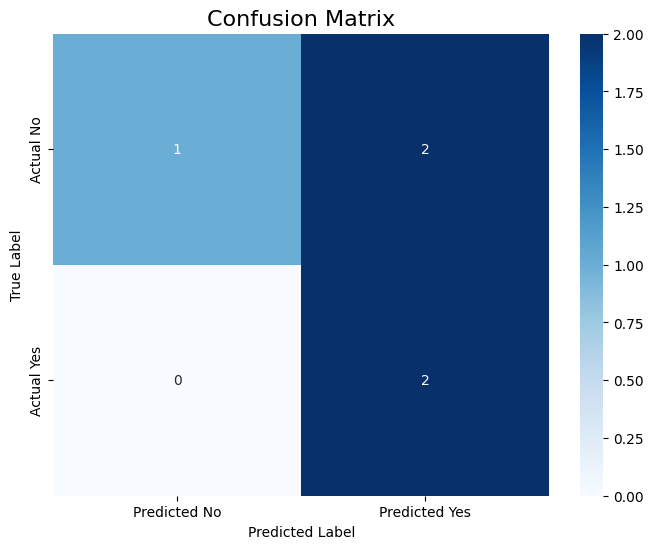


--- 8.1: Decision Tree Visualization ---
The decision tree has been generated. Look for the 'decision_tree_bank_marketing.png' file.


In [1]:
# ==============================================================================
# Decision Tree Classifier for Bank Marketing Prediction
# ==============================================================================
# This script builds and evaluates a Decision Tree Classifier to predict whether
# a customer will subscribe to a term deposit based on their demographic and
# behavioral data.
#
# The dataset is a modified version of the UCI Bank Marketing dataset, tailored
# for a clear, educational example.

# ------------------------------------------------------------------------------
# 1. Import Libraries
# ------------------------------------------------------------------------------
# pandas: For data manipulation.
# train_test_split: To split the data into training and testing sets.
# DecisionTreeClassifier: The core machine learning model.
# accuracy_score, classification_report, confusion_matrix: For model evaluation.
# LabelEncoder: To convert categorical text data into numerical format.
# seaborn: For creating the heatmap visualization.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
import graphviz

# ------------------------------------------------------------------------------
# 2. Create the Dataset
# ------------------------------------------------------------------------------
# This dataset contains 25 samples with 8 features and a target variable.
# It includes a mix of numerical and categorical data, including some missing values.
data = {
    'age': [35, 42, 50, 25, 60, 45, 30, 55, 33, 48, 28, 40, 52, 29, 38, 41, 58, 27, 39, 44, 51, 32, 26, 65, 47],
    'job': ['blue-collar', 'technician', 'management', 'student', 'retired', 'services', 'management', 'retired', 'blue-collar', 'technician', 'student', 'services', 'management', 'technician', 'retired', 'technician', 'retired', 'student', 'management', 'technician', 'retired', 'services', 'student', 'retired', 'management'],
    'marital': ['married', 'single', 'married', 'single', 'married', 'single', 'married', 'married', 'single', 'married', 'single', 'married', 'married', 'single', 'married', 'married', 'married', 'single', 'married', 'single', 'married', 'single', 'single', 'married', 'married'],
    'education': ['secondary', 'tertiary', 'tertiary', 'primary', 'primary', 'secondary', 'tertiary', 'primary', 'secondary', 'secondary', 'primary', 'tertiary', 'tertiary', 'secondary', 'primary', 'tertiary', 'primary', 'secondary', 'tertiary', 'secondary', 'primary', 'secondary', 'primary', 'tertiary', 'tertiary'],
    'default_credit': ['no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no'],
    'balance': [234, 1500, 300, 50, 1200, 450, 700, 950, 200, 1800, 100, 600, 2500, 400, 1100, 1300, 850, 150, 1900, 250, 350, 600, 50, 1500, 1000],
    'housing': ['yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes'],
    'loan': ['no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no'],
    'y': ['no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes'] # Target: 'yes' if they subscribed, 'no' otherwise
}

# Create a Pandas DataFrame
df = pd.DataFrame(data)

print("--- 2.1: Dataset created ---")
print(df.head())
print("\n")

# ------------------------------------------------------------------------------
# 3. Data Pre-processing
# ------------------------------------------------------------------------------
# Decision Trees work best with numerical data, so we need to convert
# our categorical features into numerical format using Label Encoding.

# Separate features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=np.number).columns

# Apply Label Encoding to convert categorical features to numbers
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Convert the target variable 'y' to 0 and 1
y = le.fit_transform(y)

print("--- 3.1: Data Pre-processing complete ---")
print("Features (X) after encoding:")
print(X.head())
print("\nTarget variable (y) after encoding:")
print(y[:5])
print("\n")

# ------------------------------------------------------------------------------
# 4. Split the Data
# ------------------------------------------------------------------------------
# Split the dataset into training and testing sets.
# The training set trains the model, and the testing set evaluates its performance
# on unseen data. We'll use an 80/20 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- 4.1: Data Split complete ---")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print("\n")

# ------------------------------------------------------------------------------
# 5. Build and Train the Decision Tree Classifier
# ------------------------------------------------------------------------------
# Create a Decision Tree Classifier instance.
# We set `max_depth` to prevent the tree from becoming too complex and overfitting.
model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the model on the training data.
print("--- 5.1: Training the model... ---")
model.fit(X_train, y_train)
print("--- 5.2: Model training complete! ---")
print("\n")

# ------------------------------------------------------------------------------
# 6. Make Predictions and Evaluate the Model
# ------------------------------------------------------------------------------
# Use the trained model to make predictions on the test set.
y_pred = model.predict(X_test)

# Evaluate the model's performance.
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("--- 6.1: Model Evaluation ---")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

# ------------------------------------------------------------------------------
# 7. Visualize the Confusion Matrix
# ------------------------------------------------------------------------------
# A heatmap is an excellent way to visualize the confusion matrix.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ------------------------------------------------------------------------------
# 8. Visualize the Decision Tree (Optional)
# ------------------------------------------------------------------------------
# This step helps to interpret how the model makes its decisions.
# It requires the graphviz and pydotplus libraries.
# If you don't have them, you can comment this section out.

# Get feature names and class names
feature_names = X.columns
class_names = ['no', 'yes']

try:
    dot_data = export_graphviz(
        model,
        out_file=None,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        special_characters=True
    )
    # Create a graph from the dot data
    graph = graphviz.Source(dot_data)

    # Save the graph to a file (e.g., as a PNG)
    print("\n--- 8.1: Decision Tree Visualization ---")
    print("The decision tree has been generated. Look for the 'decision_tree_bank_marketing.png' file.")
    graph.render("decision_tree_bank_marketing", format="png", cleanup=True)

except ImportError:
    print("\n--- 8.2: Visualization Libraries Not Found ---")
    print("To visualize the decision tree, please install the necessary libraries:")
    print("pip install graphviz pydotplus")
    print("You may also need to install Graphviz software on your system.")